![RedvsWhite](https://miro.medium.com/v2/resize:fit:1024/format:webp/1*fi8BwVknwMhlkVgaU2vSjQ.png)

# <Span style= 'color: #800020'> CLUSTERING PROJECT : PREDICTING WINE QUALITY 
* By Annie Carter
* Sourced: Data World

### <Span style= 'color: #800020'>PROJECT DESCRIPTION
This project explores factors influencing wine quality using data from data.world on red and white wine. Chemical properties are examined and correlated with overall quality using cluster analysis and regression models for predictions.

### <Span style= 'color: #800020'>PROJECT GOALS
1. Identify key variables (drivers) influencing wine quality ratings.
2. Apply Kmeans clustering to explore relationships among wine chemical properties.
3. Evaluate the effectiveness of the resulting clusters in linear and polynomial regression models for predicting wine quality ratings and implement the final model for future predictions.

### <Span style= 'color: #800020'>DATA DICTIONARY

|     Target         |  Datatype  |       Definition                                |
|:-------------------|:-----------|:------------------------------------------------|
|  quality           |  int       |  wine quality median rating from 3 wine experts |


|  Column Name       |  Datatype  |     Definition                                  |
|:-------------------|:-----------|:------------------------------------------------|
|  fixed acidity     |  float     |  acidic compunds contributing to tartness       |
|  volatile acidity  |  float     |  acidic compounds contributing vinegar flavor   |
|  citric acid       |  float     |  specific acid contributing to tartness         |
|  residual sugar    |  float     |  sugar left after fermenting                    |
|  chlorides         |  float     |  chloride-based salts (saltiness                |
|free sulfur dioxide |  float     |  sulfur in wine that has not yet reacted        |
|total sulfur dioxide|  float     |  total sulfur, reacted and not reacted          |
|  density           |  float     |  hydrometer reading of alcohol content          |    
|  pH                |  float     |  acidity vs alkilinity                          |    
|  sulphates         |  float     |  type of sulfur-based salt                      |    
|  alcohol           |  float     |  alcohol as a percentage of wine                |    
|  Yes_white         |  int       |  is this a white wine? 1 = yes, 0 = no          |     


### <Span style= 'color: #800020'>INITIAL QUESTIONS
1. Does category of wine "red or white" have a relationship to wine quality?
2. Does density have a relationship with wine quality? 
2. Does chlorides have a relationship with wine quality?
3. Does volitale acidity have a relationship with wine quality?
 

### <Span style= 'color: #800020'>EXECUTIVE SUMMARY
This project developed a ML regression models and KMeans cluster analysis to define unique clusters of values. Cluster analysis was unable to predict wine quality ratings for future wines. White wine generally received higher ratings than red wine. Key drivers for quality ratings were identified as volatile acidity, chlorides, density, and alcohol percentage, with alcohol percentage being derived from density. LASSO + LARS regression outperformed baseline. Evaluating white and red wines separately was suggested, focusing on minimizing chlorides and volatile acidity for better quality, and prolonging fermentation to decrease density and increase alcohol content for potential quality improvement.
    

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import os

import wrangle as w
import ipywidgets as widgets
from IPython.display import display

# Exploring
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from scipy.stats import pearsonr, spearmanr
# Visualizing
import matplotlib.pyplot as plt
import seaborn as sns
#Scaling 
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler,QuantileTransformer

#Clustering
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
#Modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import explained_variance_score


In [2]:
audio_file_path = '/Users/Sunshine/codeup-data-science/clustering_project/piano-tones-139846.mp3'
audio_widget = widgets.Audio(filename=audio_file_path, autoplay=True)
display(audio_widget)

Audio(value=b'')

## <Span style= 'color: #800020'>AQCUIRE AND PREPARE
* Data was obtained from the data.world Wine Quality dataset at https://data.world/food/wine-quality.
* The dataset initially contained 13 columns and 6497 rows, which were reduced to 5320 rows (81% of the original data) after preparation to ensure data integrity.
* Data preparation involved removing null values and duplicate rows. One-hot coding was applied to modify the wine types, facilitating exploration and modeling.
* The data was divided into train, validation, and test datasets using a 60%, 20%, 20% split, respectively, with a Random State of 210.

In [3]:
df_wine = w.prepare_wine_data()
df_wine.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.4,9.9,6,white


In [4]:
#csv for dataframe red and white wine
w.get_wine_data(df_wine).head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.4,9.9,6,white


In [5]:
#Dummy coding for wine type
wine_df = w.hot_wine(df_wine)
wine_df.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Yes_white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.4,9.9,6,1


### <Span style= 'color: #800020'> EXPLORATORY ANALYSIS

### 1. Does category of wine "red or white" have a relationship to wine quality?

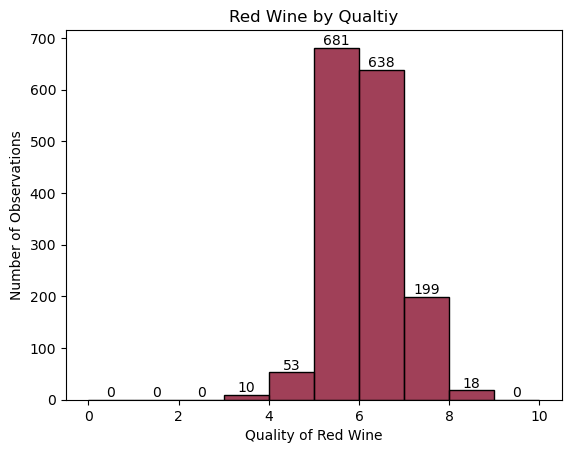

In [6]:
w.red_wine()

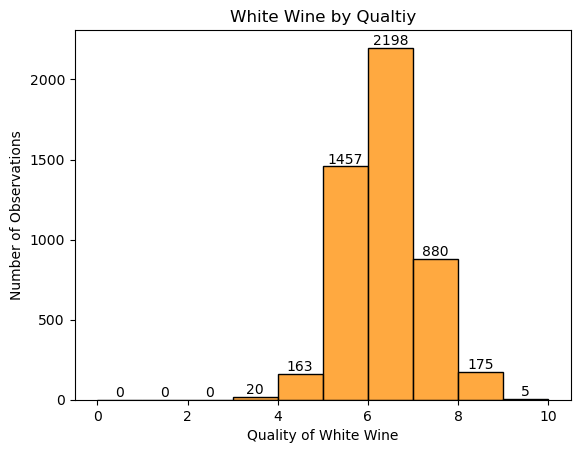

In [7]:
w.white_wine()

#### Takeaway: White wine  outperforms red wine in quality with 3 times observations 

### <Span style= 'color: #800020'>SCALING PERFORMED

In [8]:
# Wine data frame Split confirm 60%, 20% 20%
wine_train, wine_validate, wine_test = w.split_wine(wine_df)

Training set shape: (3192, 13)
Validation set shape: (1064, 13)
Test set shape: (1064, 13)


### <Span style= 'color: #800020'> FEATURE COMPARISON VISUALIZATIONS

### 2. Does Density have a relationship to wine quality?

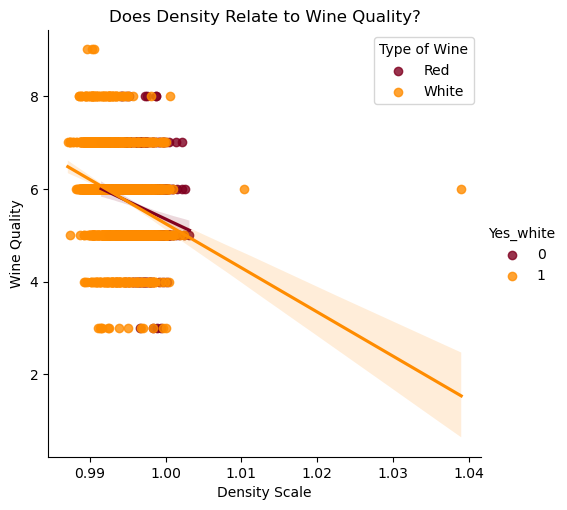

In [9]:
w.density_lmplot(wine_train)


<Span style= 'color: #800020'>Hypothesis 2 - Pearson R

- alpha = .05
- H0 = Density has no correlation with wine quality
- Ha = Density is correlated with wine quality
- Outcome: We reject or accept the Null Hypothesis.

In [10]:
w.density_stat(wine_train, wine_validate, wine_test)

train_r: -0.3127023237693185
train_p: 2.3707450199110623e-73
validate_r: -0.3176220435631977
validate_p: 2.2882931772238773e-26
The p-value is less than the alpha: True
Outcome: We reject the null


##### Takeaways: Visually as density increases wine quality decreases. The Pearsonr statistic testing rejected the null hypothesis and shows that there is a relationship between density does and wine quality.

### 3. Does Chlorides have a relationship to wine quality?

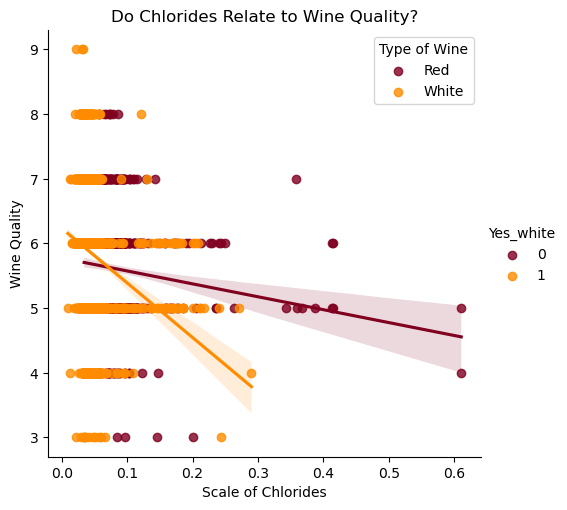

In [11]:
w.chloride_lmplot(wine_train)


<Span style= 'color: #800020'>Hypothesis 1 - Pearson R

- alpha = .05
- H0 = Chlorides has no correlation with wine quality
- Ha = Chlorides is correlated with wine quality
- Outcome: We reject or accept the Null Hypothesis.

In [12]:
w.chlorides_stat(wine_train, wine_validate, wine_test)

train_r: -0.2013186431310265
train_p: 1.5262542037423146e-30
validate_r: -0.1953621621109522
validate_p: 1.3009846928061943e-10
The p-value is less than the alpha: True
Outcome: We reject the null


##### Data visualizations show a negative relationship with chlorides and wine quality. Wine quality decreases with more chlorides. The Pearsonr statistic testing rejected the null hypothesis. There is a relationship between chlorides and wine quality because the chloride content in wine is influenced by the terroir and grape variety. Quantification is essential as it significantly affects the wine's flavor, and high concentrations can lead to an undesirable salty taste and reduced market appeal. (Coli et al. 2015)

Coli, M. S., Rangel, A. G. P., Souza, E. S., Oliveira, M. F., & Chiaradia, A. C. N. (2015). Chloride concentration in red wines: influence of terroir and grape type. Food Science and Technology, 35, 95-99.

### 4. Does Volatile Acid have a relationship to wine quality?

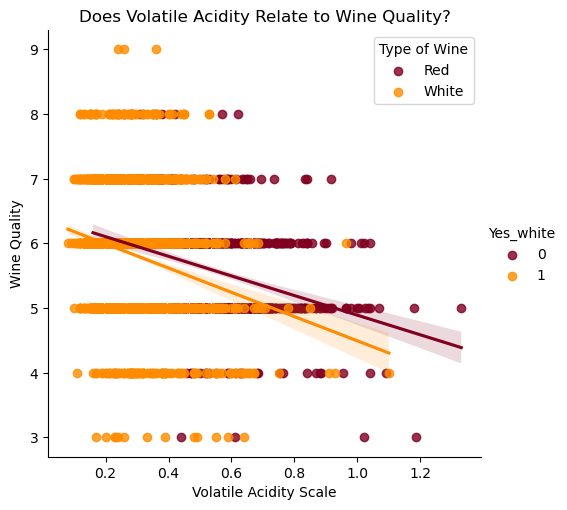

In [13]:
w.acid_lmplot(wine_train)

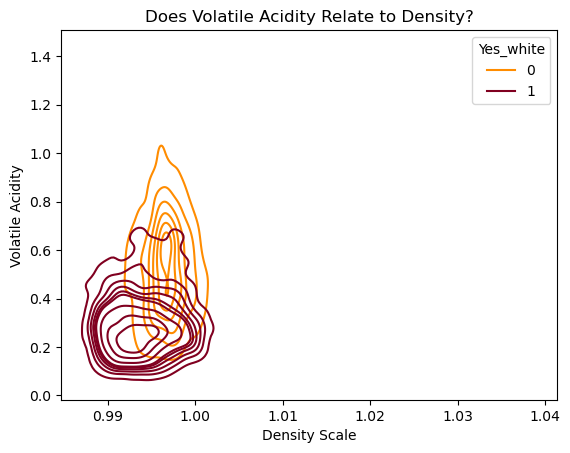

In [14]:
w.wine_KDE(wine_train)


##### Takeaways:  Visually as volaltile acidity increases wine quality decreases. KDE model showed possible clusters between volatile acidity and density. Which will be further analyzed with a Kmeans Cluster Model .

### <Span style= 'color: #800020'>EXPLORATION SUMMARY
White wine outperforms red wine in quality with three times more observations. There is a negative relationship between wine quality and density, as evidenced by visualizations and the Pearson correlation test. Similarly, a negative relationship exists between wine quality and chlorides, indicating that higher chloride content may lead to reduced market appeal. Volatile acidity also negatively impacts wine quality, and potential clusters between volatile acidity and density will be further explored using a Kmeans Cluster Model.

## <Span style= 'color: #800020'> Clustering using KMeans and Standard Scaler

In [15]:
#Create X using volatiel_acid and density
X = wine_train[['volatile acidity', 'density','chlorides']]


In [16]:
# Standard Scarler using X.columns
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

#### <Span style= 'color: #800020'> Determine k

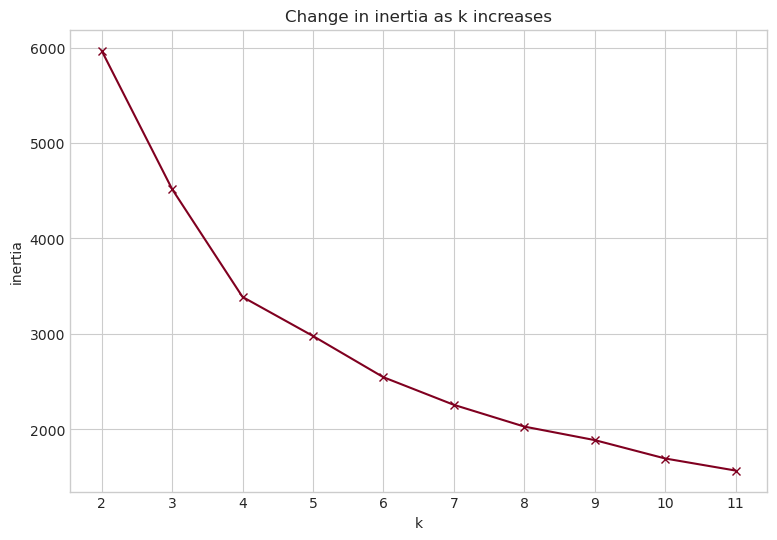

In [17]:
# Elbow approach for to determine K "Codeup instructor "
w.k_elbow(X_scaled)

#### <Span style= 'color: #800020'>We are going to go with "3" for k
### <Span style= 'color: #800020'>Create 3 cluster  models and visualize them 

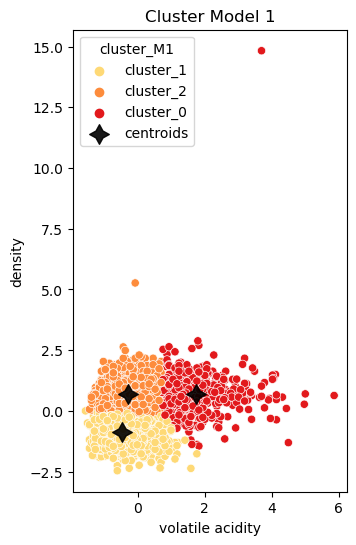

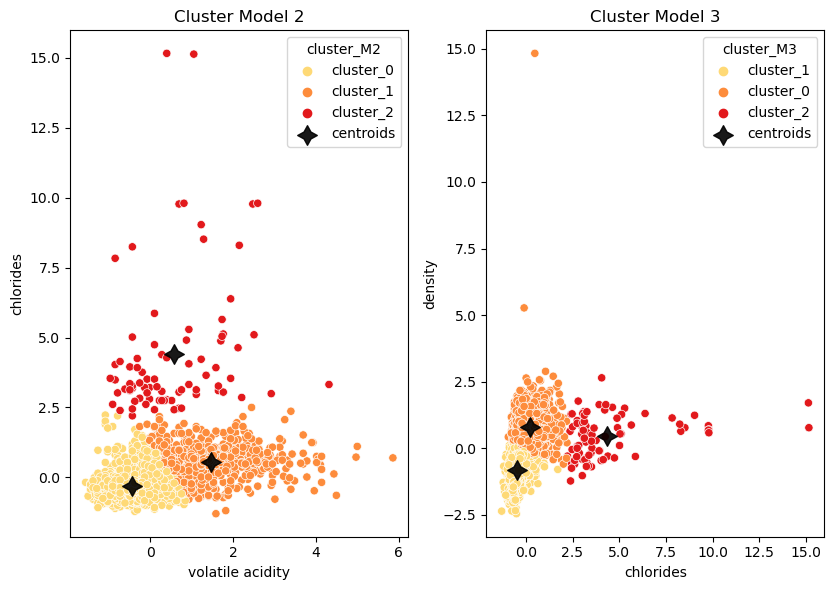

In [18]:
#Cluster Models created using volatile acidity, density and chlorides
wine_train, X_scaled, scaler, kmeans, centroids1, centroids2, centroids3 = w.create_cluster_models(wine_train, X_scaled, 3)


### <Span style= 'color: #800020'> Cluster Summary 
Inconclusive cluster analysis due to high-density data in certain regions. The cluster analysis did not provide distinct enough clusters for purposes of using in a regression model. Conduct DBSCAN cluster analysis because this method eliminates outliers, this may prove more useful in defining unique clusters of values
    

## <Span style= 'color: #800020'> Four Regression Models OLS, Lasso+Lars, Tweedie and Polynomial

In [23]:
#Split data for modeling
X_train, y_train, X_validate, y_validate, X_test, y_test = w.x_y_split(wine_train, wine_validate, wine_test)

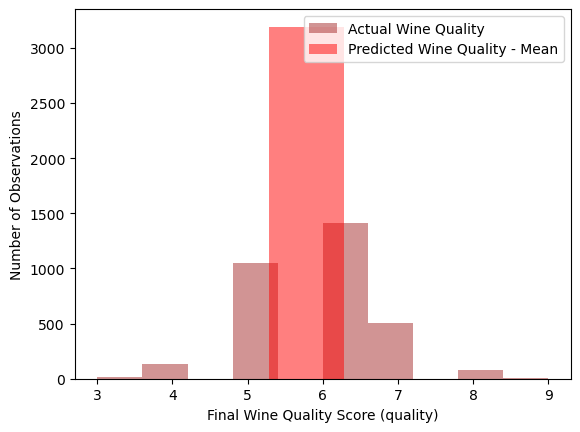

In [30]:
# Move to the bottom before running all cells. Then moved back up for flow. Ran scaling on Standard Scaler in explore. Compared Actual to mean
w.act_vs_pred(y_train)

The assumption of a normal distribution for the target variable, 'Wine Quality' makes it suitable for continuous target variables with a power of 0.

#### BASELINE 

In [24]:
y_train.mean(), y_train.median()

(5.781328320802005, 6.0)

In [25]:
#Mean Baseline determined
y_train, y_validate, metric_df = w.get_baseline(y_train, y_validate)

In [26]:
#OLS, Lasso+Lars, Tweedie Regression, and Polynomial Regression ran
y_train, y_validate, metric_df = w.ols_lasso_tweedie_poly(X_train, X_validate, y_train, y_validate,X_test, metric_df)

RMSE for OLS using LinearRegression
        Training/In-Sample:  0.73 
        Validation/Out-of-Sample: 0.74

RMSE for LassoLars
        Training/In-Sample:  0.74 
        Validation/Out-of-Sample: 0.76

RMSE for TweedieRegressor
        Training/In-Sample:  0.78 
        Validation/Out-of-Sample: 0.82

RMSE for Polynomial Model, degrees=2
    Training/In-Sample:  0.69
    Validation/Out-of-Sample:  0.76



In [27]:
#Reviewed findings
metric_df.head()

,model,RMSE_train,RMSE_validate,R2_validate
0,mean_baseline,0.872040,0.911738,-2.220446e-16
1,ols,0.731119,0.740754,3.391732e-01
2,lasso_alpha0.01,0.743824,0.759656,3.058312e-01
3,tweedie_power0_alpha1.0,0.781797,0.817660,1.958821e-01
4,poly_alpha.2,0.688032,0.764267,2.978224e-01


### <Span style= 'color: #800020'> Regression Model Summary 
Perform individual assessments for white and red wines, considering the higher overall quality observed in white wines.
Prioritize the reduction of chlorides (attributed to saltiness) and volatile acidity (associated with vinegar flavor) to optimize wine quality.
Explore the possibility of extending fermentation to decrease density, leading to an increase in alcohol content, which may positively impact wine quality.

### <Span style= 'color: #800020'> Top Model Summary 

In [28]:
#Tested Lasso+Lars for Test dataset
w.lasso_test_model(X_train, y_train, X_test, y_test)


RMSE for LassoLars alpha=0.01
    Test Performance: 0.72
    Baseline: 5.78



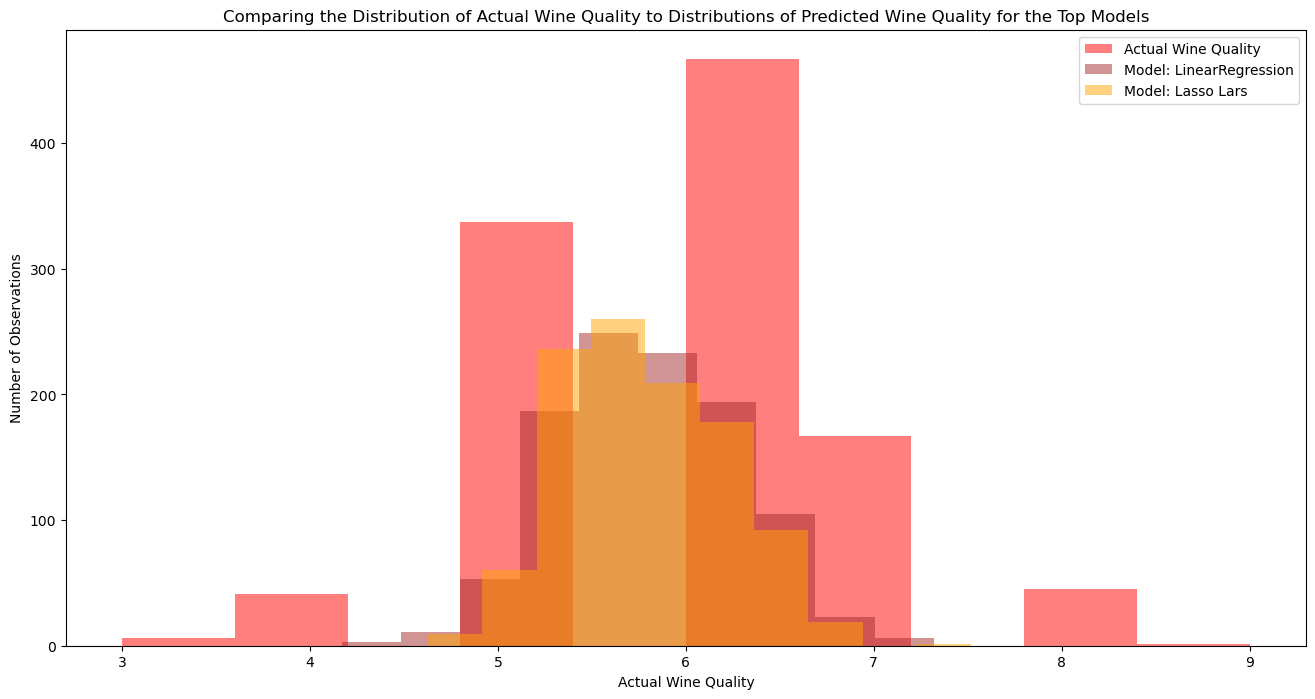

In [29]:
#Compared findings to actual distributions
w.hist_mods(y_validate)

## <Span style= 'color: #800020'> Key Findings:
- White wine outperformed red wine in quality by three fold. 
- Consider prolonging fermentation to reduce density, leading to an increase in alcohol content and potentially improving wine quality.
- Prioritize efforts on minimizing chlorides (associated with saltiness) and volatile acidity (linked to vinegar flavor) to enhance wine quality.
- Inconclusive cluster analysis due to high-density data in certain regions making it challenging to differentiate.


## <Span style= 'color: #800020'> Conclusion:
In conclusion, this project employed machine learning regression models and KMeans cluster analysis to identify distinct value clusters. However, the cluster analysis did not yield effective predictions for future wine quality ratings. Notably, white wine tended to receive higher ratings compared to red wine. The key predictors for poor wine quality ratings were found to be volatile acidity, chlorides, and density. These predictors showed a clear relationship, indicating that an increase in these features resulted in a decrease in wine quality.

Among the regression models used, Ordinary Least Squares (OLS) and LASSO + LARS regression emerged as the top performers. Ultimately, the LASSO + LARS regression was chosen as the preferred model due to its consistent performance throughout testing, outperforming the baseline model by 17%.


## <Span style= 'color: #800020'> Next Steps and Recommendations:
- To gain more nuanced insights, conducting separate evaluations for white and red wines is advised, with emphasis on minimizing chlorides and volatile acidity for improved quality
- Vintners should explore collecting data on different variables (e.g., temperature, duration of fermentation) to see if they may improve data for future clustering.
-  Consider conducting DBSCAN cluster analysis to eliminate outliers and potentially define unique clusters more effectively.
- Investigate diverse variables, focusing on factors that predict superior quality in wines.
- Enhance data collection by including more wine experts (e.g., 4-6) to gather additional information for analysis.